# DAT210x - Programming with Python for DS

## Module5- Lab8

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot') # Look Pretty

### A Convenience Function

This convenience method will take care of plotting your test observations, comparing them to the regression line, and displaying the R2 coefficient

In [3]:
def drawLine(model, X_test, y_test, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    print("Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0])
    print("Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0])
    print("Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0])

    score = model.score(X_test, y_test)
    title += " R2: " + str(score)
    ax.set_title(title)

    plt.show()

### The Assignment

Load up the data here into a variable called `X`. As usual, do a .describe and a print of your dataset and compare it to the dataset loaded in a text file or in a spread sheet application:

In [4]:
X = pd.read_csv('./Datasets/life_expectancy.csv', sep='\t')
X.head()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
0,1900,46.6,48.7,32.5,33.5
1,1950,66.5,72.2,59.1,62.9
2,1960,67.4,74.1,61.1,66.3
3,1970,68.0,75.6,60.0,68.3
4,1975,69.5,77.3,62.4,71.3


In [5]:
X.isna().sum()
# no hole in data

Year           0
WhiteMale      0
WhiteFemale    0
BlackMale      0
BlackFemale    0
dtype: int64

In [6]:
X.dtypes
# no need for further type conversion

Year             int64
WhiteMale      float64
WhiteFemale    float64
BlackMale      float64
BlackFemale    float64
dtype: object

Create your linear regression model here and store it in a variable called `model`. Don't actually train or do anything else with it yet:

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

Slice out your data manually (e.g. don't use `train_test_split`, but actually do the indexing yourself. Set `X_train` to be year values LESS than 1986, and `y_train` to be corresponding 'WhiteMale' age values. You might also want to read the note about slicing on the bottom of this document before proceeding:

In [8]:
train = X[X['Year']<1986]
X_train = train['Year'].values.reshape(-1,1)
y_train = train['WhiteMale'].values.reshape(-1,1)
print('X/y_train ', X_train.shape, y_train.shape)

X/y_train  (11, 1) (11, 1)


Train your model then pass it into `drawLine` with your training set and labels. You can title it 'WhiteMale'. `drawLine` will output to the console a 2014 extrapolation / approximation for what it believes the WhiteMale's life expectancy in the U.S. will be... given the pre-1986 data you trained it with. It'll also produce a 2030 and 2045 extrapolation:

Est 2014 WhiteMale (pre-1986) Life Expectancy:  [80.85635426]
Est 2030 WhiteMale (pre-1986) Life Expectancy:  [85.39349384]
Est 2045 WhiteMale (pre-1986) Life Expectancy:  [89.6470622]


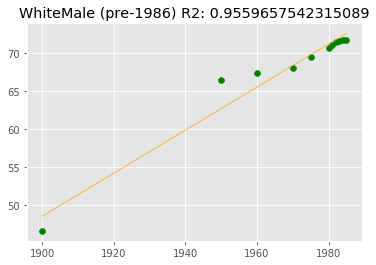

In [9]:
model.fit(X_train, y_train)
drawLine(model, X_train, y_train, 'WhiteMale (pre-1986)')

Print the actual 2014 'WhiteMale' life expectancy from your loaded dataset

In [13]:
print('Actual 2014 expec =', X.loc[X['Year']==2014, 'WhiteMale'].values)

Actual 2014 expec = [76.7]


Repeat the process, but instead of for WhiteMale, this time select BlackFemale. Create a slice for BlackFemales, fit your model, and then call `drawLine`. Lastly, print out the actual 2014 BlackFemale life expectancy:

X/y_train  (11, 1) (11, 1)
Est 2014 BlackFemale (pre-1986) Life Expectancy:  [88.6988994]
Est 2030 BlackFemale (pre-1986) Life Expectancy:  [96.11438808]
Est 2045 BlackFemale (pre-1986) Life Expectancy:  [103.06640871]


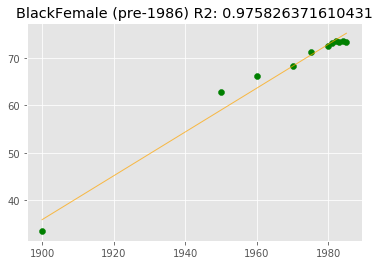

Actual 2014 expec = [78.4]


In [14]:
y_train = train['BlackFemale'].values.reshape(-1,1)
print('X/y_train ', X_train.shape, y_train.shape)
model.fit(X_train, y_train)
drawLine(model, X_train, y_train, 'BlackFemale (pre-1986)')
print('Actual 2014 expec =', X.loc[X['Year']==2014, 'BlackFemale'].values)

Lastly, print out a correlation matrix for your entire dataset, and display a visualization of the correlation matrix, just as we described in the visualization section of the course:

In [15]:
X.corr()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
Year,1.000000,0.974154,0.913907,0.960635,0.940429
WhiteMale,0.974154,1.000000,0.975164,0.987974,0.985009
WhiteFemale,0.913907,0.975164,1.000000,0.956689,0.994656
BlackMale,0.960635,0.987974,0.956689,1.000000,0.975922
BlackFemale,0.940429,0.985009,0.994656,0.975922,1.000000


In [ ]:
plt.show()

### Notes On Fitting, Scoring, and Predicting:

Here's a hint to help you complete the assignment without pulling your hair out! When you use `.fit()`, `.score()`, and `.predict()` on your model, SciKit-Learn expects your training data to be in spreadsheet (2D Array-Like) form. This means you can't simply pass in a 1D Array (slice) and get away with it.

To properly prep your data, you have to pass in a 2D Numpy Array, or a dataframe. But what happens if you really only want to pass in a single feature?

If you slice your dataframe using `df[['ColumnName']]` syntax, the result that comes back is actually a _dataframe_. Go ahead and do a `type()` on it to check it out. Since it's already a dataframe, you're good -- no further changes needed.

But if you slice your dataframe using the `df.ColumnName` syntax, OR if you call `df['ColumnName']`, the result that comes back is actually a series (1D Array)! This will cause SKLearn to bug out. So if you are slicing using either of those two techniques, before sending your training or testing data to `.fit` / `.score`, do `any_column = my_column.reshape(-1,1)`. 

This will convert your 1D array of `[n_samples]`, to a 2D array shaped like `[n_samples, 1]`. A single feature, with many samples.

If you did something like `my_column = [my_column]`, that would produce an array in the shape of `[1, n_samples]`, which is incorrect because SKLearn expects your data to be arranged as `[n_samples, n_features]`. Keep in mind, all of the above only relates to your `X` or input data, and does not apply to your `y` or labels.